Otimização de buscas
==================================

O problema fundamental a ser tratado em redes neurais é a arquitetura (ou, de forma mais direta, o tamanho de uma rede neural.

A razão ideal entre o número de nós (neurônios) e o número de camadas em uma rede de deep learning não é fixa e depende de vários fatores, como o tipo de problema, o tamanho e complexidade dos dados, e o objetivo da rede. No entanto, existem diretrizes gerais para ajudar a determinar essa relação:

1. Número de Camadas
  * **Redes rasas (poucas camadas):** São mais adequadas para problemas simples, como classificação linear ou problemas com pouca variação nos dados.
  * **Redes profundas (muitas camadas):** São melhores para capturar representações hierárquicas em problemas complexos, como visão computacional e processamento de linguagem natural.

2. Número de Nós por Camada
  * O número de nós em uma camada deve ser suficientemente grande para representar as características dos dados, mas não tão grande a ponto de causar overfitting ou desperdício computacional.
  * É comum começar com mais nós nas camadas iniciais (mais próximas da entrada) e diminuir nas camadas seguintes. Por exemplo: [128, 64, 32].
Em redes profundas, pode-se usar números constantes ou decrescentes, como [512, 256, 128, 64].

Boa práticas
------------------

1. Balancear Nós e Camadas:

  * Para dados mais complexos, prefira redes mais profundas com menos neurônios por camada.
  * Para dados mais simples, redes rasas com mais neurônios podem ser suficientes.

2. Evite Redes Excessivamente Grandes:

  * Redes com muitas camadas ou nós podem ser difíceis de treinar devido ao desvanecimento ou explosão do gradiente.
* Use técnicas como regularização (dropout, L2 regularization) para controlar overfitting.

3. Proporção Empírica:

  * Comece com 2 a 4 camadas e ajuste o número de nós para ser entre 2 e 10 vezes o número de recursos de entrada.
  * Exemplo: Se os dados têm 20 características, teste com camadas de [64, 32, 16].

4. Validação:

  * Use validação cruzada e ajuste os hiperparâmetros com base no desempenho do modelo.

5. Técnicas de Otimização:

  * Utilize buscas automáticas como Grid Search ou Random Search para encontrar a melhor combinação de camadas e nós.

Random Search
------------------

O **Random Search** é uma técnica de otimização para encontrar os melhores hiperparâmetros de um modelo de machine learning ou deep learning. Ele seleciona aleatoriamente combinações de hiperparâmetros dentro de intervalos definidos e avalia o desempenho em cada combinação. É mais eficiente que **Grid Search** em muitos casos, especialmente quando apenas alguns hiperparâmetros têm maior impacto no desempenho do modelo.



### Passos para Usar Random Search

1. Definir os Hiperparâmetros e seus Intervalos

  * Liste os hiperparâmetros do modelo que você deseja otimizar e especifique os intervalos ou distribuições de valores possíveis. Por exemplo:

    * Número de neurônios: [32, 64, 128, 256]
    * Taxa de aprendizado (learning rate): [0.0001, 0.01] (contínuo)
    * Taxa de dropout: [0.1, 0.5]
    * Número de camadas: [2, 3, 4]

2. Definir o Número de Iterações
  * Escolha quantas combinações de hiperparâmetros você deseja testar. Por exemplo, 50 iterações significam que 50 conjuntos de hiperparâmetros diferentes serão avaliados.

3. Treinar e Avaliar o Modelo

  * Para cada combinação:

    * Configure o modelo com os hiperparâmetros selecionados.
    * Treine o modelo nos dados de treino.
    * Avalie o desempenho nos dados de validação usando métricas relevantes, como acurácia, loss, ou F1-score.

4. Selecionar os Melhores Hiperparâmetros
  * Após todas as iterações, escolha a combinação de hiperparâmetros que resultou no melhor desempenho nos dados de validação.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir o modelo
model = RandomForestClassifier()

# Definir o espaço de busca
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Configurar Random Search
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinações a testar
    scoring='accuracy',
    cv=5,  # Validação cruzada
    random_state=42,
    verbose=2
)

# Dividir os dados
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo
random_search.fit(X_train, y_train)

# Resultados
print("Melhores hiperparâmetros:", random_search.best_params_)
print("Melhor acurácia:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=24; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=24; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=24; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=24; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=24; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=8, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=8, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=8, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=8, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=12, min_samples_leaf=8, 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Criar o dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Função para criar o modelo
def create_model(learning_rate, neurons, dropout_rate):
    model = Sequential()
    model.add(Input(shape=(20,)))  # Define explicitamente a forma da entrada
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Espaço de busca ajustado
param_dist = {
    'learning_rate': (0.0001, 0.01),  # Intervalo contínuo
    'neurons': [32, 64, 128, 256],    # Lista de opções
    'dropout_rate': (0.1, 0.5)        # Intervalo contínuo
}

# 4. Random Search
results = []
for i in range(20):  # Testar 20 combinações
    params = {
        k: np.random.choice(v) if isinstance(v, list) else np.random.uniform(v[0], v[1])
        for k, v in param_dist.items()
    }
    model = create_model(**params)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
    val_accuracy = history.history['val_accuracy'][-1]
    results.append((params, val_accuracy))

# 5. Selecionar os melhores hiperparâmetros
best_params = max(results, key=lambda x: x[1])[0]
print("Melhores hiperparâmetros:", best_params)

# 6. Treinar o melhor modelo
final_model = create_model(**best_params)
final_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))


Melhores hiperparâmetros: {'learning_rate': 0.0007357144837930978, 'neurons': 256, 'dropout_rate': 0.2792068744809437}
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5682 - loss: 0.6744 - val_accuracy: 0.7900 - val_loss: 0.5560
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.4972 - val_accuracy: 0.8250 - val_loss: 0.4805
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8355 - loss: 0.4134 - val_accuracy: 0.8450 - val_loss: 0.4374
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8638 - loss: 0.3842 - val_accuracy: 0.8500 - val_loss: 0.4093
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8756 - loss: 0.3434 - val_accuracy: 0.8450 - val_loss: 0.3940
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.3156 - val_accuracy: 0.8450 - val_loss: 0.3828
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.3253 - val_accuracy: 0.8500 - val_loss: 0.374

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# Criar um dataset fictício
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)

# Definir o modelo PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, 2)  # Saída com 2 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Função para treinar e avaliar o modelo
def train_and_evaluate(params):
    # Desempacotar os parâmetros
    hidden_size = params["hidden_size"]
    learning_rate = params["learning_rate"]
    dropout_rate = params["dropout_rate"]
    batch_size = params["batch_size"]
    num_epochs = params["num_epochs"]

    # Criar o modelo e definir a função de perda e otimizador
    model = SimpleNN(input_size=20, hidden_size=hidden_size, dropout_rate=dropout_rate)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Treinamento
    model.train()
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i : i + batch_size]
            y_batch = y_train[i : i + batch_size]

            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Avaliação
    model.eval()
    with torch.no_grad():
        outputs = model(X_val)
        _, predictions = torch.max(outputs, 1)
        accuracy = (predictions == y_val).float().mean().item()
    return accuracy

# Espaço de busca de hiperparâmetros
param_grid = {
    "hidden_size": [32, 64, 128],
    "learning_rate": [1e-4, 5e-4, 1e-3],
    "dropout_rate": [0.1, 0.3, 0.5],
    "batch_size": [16, 32, 64],
    "num_epochs": [5, 10, 15],
}

# Random Search
best_score = 0
best_params = None
for _ in range(10):  # Testar 10 combinações aleatórias
    params = {k: random.choice(v) for k, v in param_grid.items()}
    score = train_and_evaluate(params)
    if score > best_score:
        best_score = score
        best_params = params

print("Melhores hiperparâmetros:", best_params)
print("Melhor acurácia:", best_score)


### Vantagens do Random Search

* **Eficiência:** Testa apenas combinações aleatórias, evitando esforço desnecessário em combinações menos relevantes.
* **Flexibilidade:** Permite explorar grandes espaços de hiperparâmetros.
* **Foco em Hiperparâmetros Relevantes:** Com o mesmo número de experimentos, Random Search tem maior chance de encontrar combinações eficazes do que Grid Search.

Use Random Search sempre que o espaço de busca for grande e você não tiver certeza de quais hiperparâmetros são mais críticos.

Otimização Bayesiana
------------------------

Utiliza métodos probabilísticos para modelar a função de custo e encontrar melhores combinações de hiperparâmetros com menos iterações.

### Como Funciona a Bayesian Optimization?

1. **Modelo Probabilístico:** Um modelo, geralmente um processo gaussiano, é ajustado para prever o desempenho (função de custo) com base nos hiperparâmetros testados.

2. **Aquisição de Informação:** Um "método de aquisição" escolhe o próximo conjunto de hiperparâmetros para testar, baseado na incerteza do modelo e no potencial de melhorar os resultados.

3. **Iteração:** O processo é repetido até encontrar os hiperparâmetros ideais ou atingir um limite de iterações.

In [ ]:
!pip install optuna
!pip install scikeras

In [ ]:
import optuna
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dados
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Função para criar o modelo
def create_model(trial):
    model = Sequential()
    model.add(Dense(
        trial.suggest_int("neurons", 32, 256), activation='relu', input_dim=20
    ))
    model.add(Dropout(trial.suggest_uniform("dropout_rate", 0.1, 0.5)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Função objetivo
def objective(trial):
    model = create_model(trial)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Criar o estudo
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)  # Testar 30 combinações

# Melhor resultado
print("Melhores hiperparâmetros:", study.best_params)
print("Melhor acurácia:", study.best_value)


[I 2024-11-18 10:17:10,875] A new study created in memory with name: no-name-8a87dc69-6833-4402-aebb-9dae8bdf72c3
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
<ipython-input-11-14d635a5c981>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  model.add(Dropout(trial.suggest_uniform("dropout_rate", 0.1, 0.5)))
<ipython-input-11-14d635a5c981>:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  optimizer=Adam(lear

Melhores hiperparâmetros: {'neurons': 75, 'dropout_rate': 0.19261414753002268, 'learning_rate': 0.001573245348089842}
Melhor acurácia: 0.8700000047683716


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Criar dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)

# Modelo PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(48, 96)
        self.fc2 = nn.Linear(96, 192)
        self.fc3 = nn.Linear(192, 168)
        self.fc4 = nn.Linear(168, 96)
        self.fc5 = nn.Linear(96, 48)
        self.fc6 = nn.Linear(48, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# Função objetivo para Optuna
def objective(trial):
    # Sugerir hiperparâmetros
    hidden_size = trial.suggest_categorical("hidden_size", [32, 64, 128])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    num_epochs = trial.suggest_int("num_epochs", 5, 15)

    # Criar o modelo
    model = SimpleNN(input_size=20, hidden_size=hidden_size, dropout_rate=dropout_rate)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Treinamento
    model.train()
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i : i + batch_size]
            y_batch = y_train[i : i + batch_size]

            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Avaliação
    model.eval()
    with torch.no_grad():
        outputs = model(X_val)
        _, predictions = torch.max(outputs, 1)
        accuracy = (predictions == y_val).float().mean().item()

    return accuracy

# Otimizar com Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # Realizar 20 experimentos

# Resultados
print("Melhores hiperparâmetros:", study.best_params)
print("Melhor acurácia:", study.best_value)


[I 2024-11-18 10:20:45,679] A new study created in memory with name: no-name-eb1e90c1-8a02-4734-af2f-74b7bf6c775c
<ipython-input-12-52d0c27c9b24>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
<ipython-input-12-52d0c27c9b24>:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.1, 0.5)
[I 2024-11-18 10:20:53,435] Trial 0 finished with value: 0.824999988079071 and parameters: {'hidden_size': 32, 'learning_rate': 0.00046045532196729914, 'dropout_rate': 0.24167055192436054, 'batch_size': 16, 'num_epochs': 9}. Best is trial 0 with value: 0.824999988079071.
<ipython-inpu

Melhores hiperparâmetros: {'hidden_size': 32, 'learning_rate': 0.0075804694457668196, 'dropout_rate': 0.4520206745814893, 'batch_size': 16, 'num_epochs': 8}
Melhor acurácia: 0.8799999952316284


### Vantagens do Bayesian Optimization

1. **Exploração Inteligente:**
  * Escolhe combinações com maior probabilidade de sucesso em vez de testar todas as possibilidades.

2. **Menos Iterações:**
  * Encontra bons hiperparâmetros com menos combinações.

3. **Flexibilidade:**
  * Funciona bem para otimizar tanto parâmetros contínuos (como taxas de aprendizado) quanto discretos (como número de camadas).

Use Bayesian Optimization para problemas onde o espaço de hiperparâmetros é grande ou onde treinar cada modelo é caro em termos computacionais.

# PROBLEMAS ENFRENTADOS MESMO USANDO TÉCNICAS DE OTIMIZAÇÃO DE BUSCA

Introdução à Teoria de Deep Learning

Notações:

* $L$ é o número de camadas ocultas;
* $l$ é uma camada oculta específica;
* $x$ é o input, um vetor $n$ de dimensão de 0;
* $\sigma$ é uma função de ativação;
* $w^{(l)}$ são os pesos das matrizes;
* $N_l$ é o tamanho da l-ésima camada oculta;

Inferindo que uma rede $Z$ com camadas totalmente conectadas pode ser representada como:

\begin{align}
Z^{(L + 1)}(x) = w^{(L+1)} \leftarrow \sigma w^{(L)} \leftarrow \sigma w^{(L-1)} \leftarrow \sigma .... \leftarrow \sigma w^{(1)} x
\end{align}

onde cada $w^{l_{i}}$ incorpora $x$ em um espaço $n$ unidimensional e aplica $\sigma$ a cada elemento do vetor resultante $x_{w^{l} \sigma}$, transmitindo-o a próxima $w^{l_{i+1}}$.

E, de forma extensiva, a matriz de pesos pode ser representada como:

\begin{align}
w^{(l)} \rightarrow N_l \times N_{l-1}
\end{align}

Q.1 - Porque a otimização funciona mesmo quando a loss não é convexa?
===============================================================

Super-parametrização:
-------------------

Número de parâmetros de um modelo (pesos, bias) $>>>$ Número de pontos de dado (um única instância de coleta ou observação) $>>>$ 1

Abordagem 1: encontrar a melhor combinação de parâmetros por meio da busca ao longo do espaço de parâmetros
--------------------------------------------------------

Considere o exemplo matemático abaixo, onde a função de perda considerando o espaço de parâmetros possíveis pode ser expressa por:

\begin{align}
ls = \frac{\sin\left(3 \times \sqrt{x^2 \times y^2}\right)}{\left(\sqrt{x^2 \times y^2} + 1 + 0.5\right) \times \sin(x) \times \cos(x)}
\end{align}


Considerando, de forma extremamente simplificada, que apenas dois parâmetros p1 e p2 atuam sobre o modelo, o espaço de parâmetros teria o mapa de calor a seguir

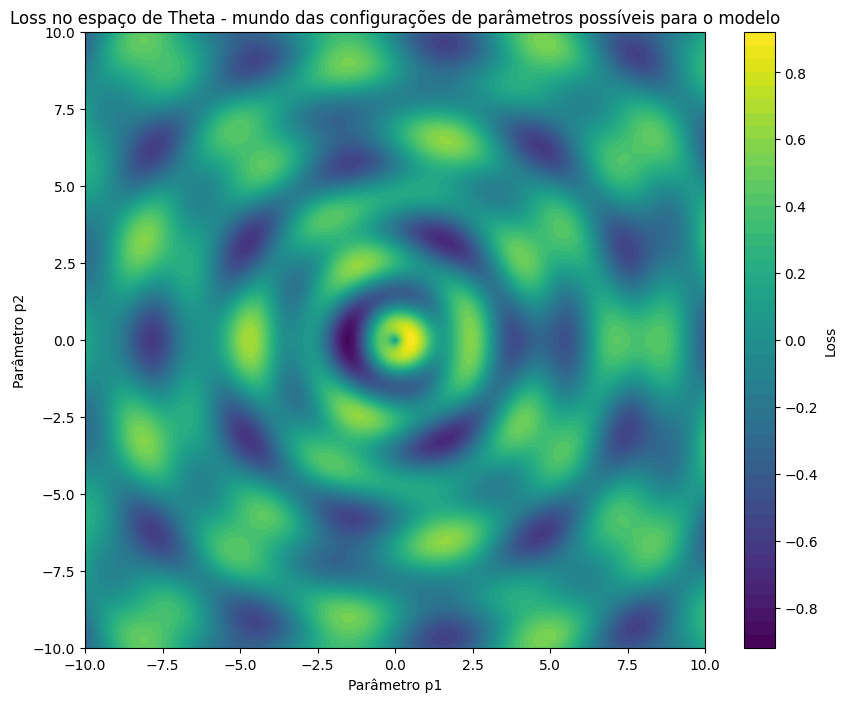

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo uma função de perda com múltiplos mínimos locais
def loss_function(x, y):
    return np.sin(3 * np.sqrt(x**2 + y**2)) / (np.sqrt(x**2 + y**2) + 1) + 0.5 * np.sin(x) * np.cos(y)

# Criando uma grade de valores para x e y
p1 = np.linspace(-10, 10, 400)
p2 = np.linspace(-10, 10, 400)
P1, P2 = np.meshgrid(p1, p2)
ls = loss_function(P1, P2)

# Criando o gráfico de mapa de calor
plt.figure(figsize=(10, 8))
plt.contourf(P1, P2, ls, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.title('Loss no espaço de Theta - mundo das configurações de parâmetros possíveis para o modelo')
plt.xlabel('Parâmetro p1')
plt.ylabel('Parâmetro p2')
plt.show()

O que, caso pegássemos os pares [-8, -8], [-4, -4], [0, 0], [4, 4], [8, 8] para p1 e p2, respectivamente, teríamos as seguintes posições de cada par no espaço de busca.

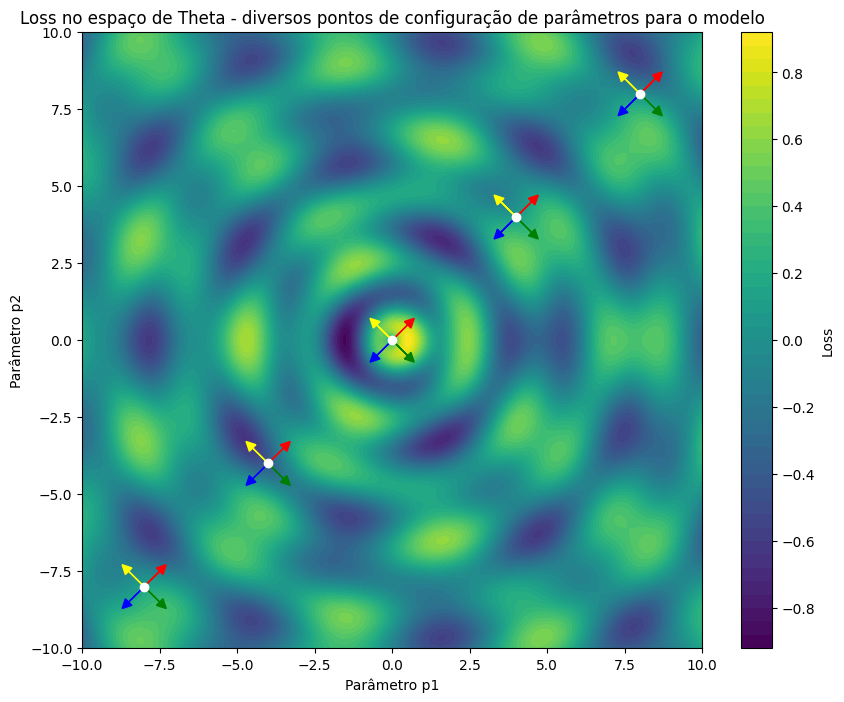

In [ ]:
# Criando um vetor de parâmetros theta
theta = np.array([[-8, -8], [-4, -4], [0, 0], [4, 4], [8, 8]])

# Calculando a função de perda nos pontos theta
theta_loss = loss_function(theta[:, 0], theta[:, 1])

# Criando o gráfico de mapa de calor com vetores de parâmetros theta
plt.figure(figsize=(10, 8))
plt.contourf(P1, P2, ls, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.title('Loss no espaço de Theta - diversos pontos de configuração de parâmetros para o modelo')
plt.xlabel('Parâmetro p1')
plt.ylabel('Parâmetro p2')

# Adicionando os vetores de parâmetros theta ao gráfico
plt.scatter(theta[:, 0], theta[:, 1], color='white', zorder=5)
for t in theta:
    plt.arrow(t[0], t[1], 0.5, 0.5, head_width=0.3, head_length=0.3, fc='red', ec='red')
    plt.arrow(t[0], t[1], -0.5, -0.5, head_width=0.3, head_length=0.3, fc='blue', ec='blue')
    plt.arrow(t[0], t[1], 0.5, -0.5, head_width=0.3, head_length=0.3, fc='green', ec='green')
    plt.arrow(t[0], t[1], -0.5, 0.5, head_width=0.3, head_length=0.3, fc='yellow', ec='yellow')

plt.show()

Transpondo o problema de mapeamento de parâmetros para mapeamento de predições por meio dos dados de treinamento
------------------------------------------------------------------------------------

Considerando que o espaço de parâmetros é muito maior que o número de pontos de dados coletados e/ou observados, reduzir o espaço de busca pode levar a um melhor resultado, economizando não só tempo, mas também encontrando melhores configurações de parâmetros, de forma reflexa.

Para se empreender a este tipo de busca por soluções, `é necessário deixar de pensar em quais são os conjuntos de parâmetros a serem configurados e passar a observar os valores obtidos ao longo das etapas de treinamento da rede`.

Desta forma, consideremos:
* Um mapa de parâmetros $\omega$;
* $\omega$ mapeia o vetor de parâmetros $\theta$ para um conjunto de valores $(x_i; \theta)$ que o modelo $Z$ assume ao processar os pontos de dados de treinamento;
* desde $i = 1$  até $i$ = nº de pontos de dados.

\begin{align}
\omega \rightarrow Z^{(L + 1)}(x_i ; \theta);
\end{align}


Isto possibilita analisarmos cada configuração de parâmetros por meio dos resultados obtidos a partir dos dados de treinamento.

Considerando que a `funções de LOSS` das saídas das redes são convexas, podemos deduzir que o melhor caminho seria seguir o caminho do gradiente desta função.

Convergência atingida após 64 iterações.


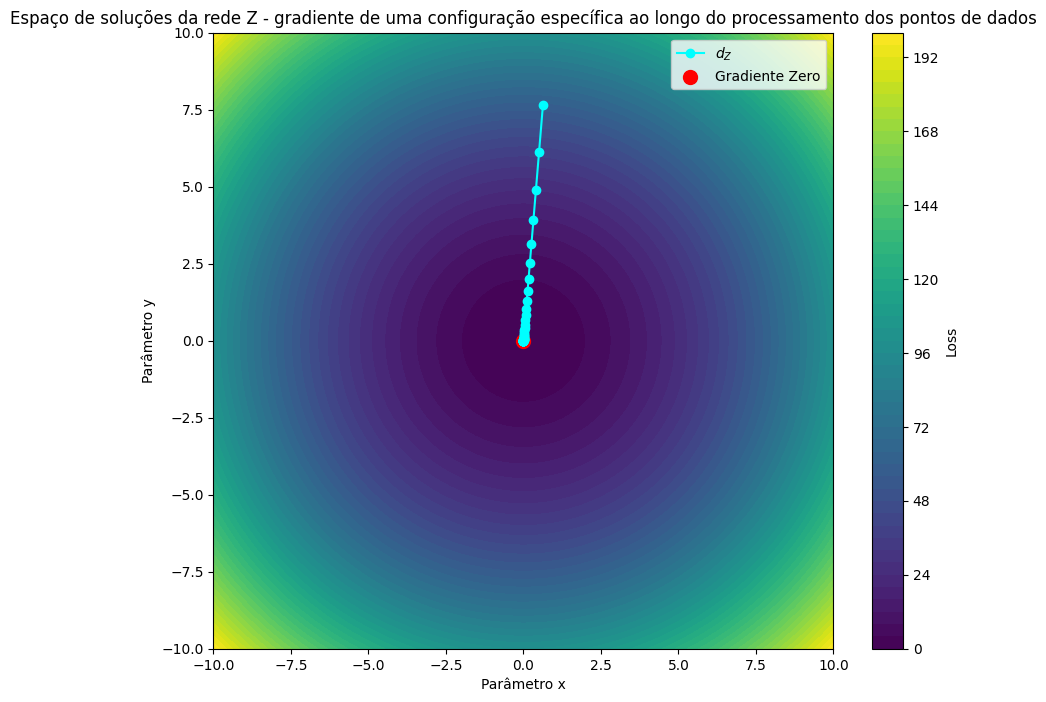

In [ ]:
# Definindo uma função convexa simples
def convex_function(x, y):
    return x**2 + y**2

# Definindo a função gradiente da função convexa
def gradient_function(x, y):
    return 2 * x, 2 * y

# Criando uma grade de valores para x e y
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = convex_function(X, Y)

# Inicializando parâmetros para o método de Gradiente Descendente
x, y = np.random.uniform(-10, 10, 2)  # Ponto inicial randômico
alpha = 0.1  # Taxa de aprendizado
tolerance = 1e-6  # Tolerância para a convergência
max_iterations = 100  # Número máximo de iterações

# Listas para armazenar os pontos durante a otimização
path_x = [x]
path_y = [y]

# Gradiente Descendente
for i in range(max_iterations):
    grad_x, grad_y = gradient_function(x, y)
    new_x = x - alpha * grad_x
    new_y = y - alpha * grad_y

    # Verificar a convergência
    if np.sqrt((new_x - x)**2 + (new_y - y)**2) < tolerance:
        print(f'Convergência atingida após {i} iterações.')
        break

    x, y = new_x, new_y
    path_x.append(x)
    path_y.append(y)

# Criando o gráfico de mapa de calor com o caminho do Gradiente Descendente
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.title('Espaço de soluções da rede Z - gradiente de uma configuração específica ao longo do processamento dos pontos de dados')
plt.xlabel('Parâmetro x')
plt.ylabel('Parâmetro y')

# Marcando o caminho do Gradiente Descendente
plt.plot(path_x, path_y, marker='o', color='cyan', label='$d_{Z}$')
plt.scatter(0, 0, color='red', s=100, label='Gradiente Zero')

# Legenda
plt.legend()

plt.show()


Premissa 1: quando o número de parâmetros é muito maior que o número de pontos de dados, a matriz Jacobiana do mapa de parâmetros de uma configuração $\theta$ específica é de posto completo
---------------

Razões para esta premissa:
________________________________

1. Dado que o número de parâmetros é muito maior que o número de pontos de dados, alguns parâmetros trabalham para o ajuste de alguns pontos de dados, outros parâmetros trabalham para o ajuste de outros pontos de dados;
2. Esta possibilidade diminui a concorrência entre pontos de dados no ajustes dos parâmetros.

Assumindo que a matriz jacobiana de uma configuração específica tem posto completo;
________________________________________________________________________________________

1. Qualquer direção que se deseje ir em uma configuração específica de parâmetros, há uma direção correspondente no espaço de todos os parâmetros possíveis (sobrejetividade);
2. Em consequência do posto completo da jacobiana, pode-se concluir que há somente um mínimo para a função.

Definição do posto de uma matriz
___________________________________

O posto (ou "rank") de uma matriz $A$ é o maior número de colunas (ou linhas) linearmente independentes na matriz. Isso pode ser entendido de várias maneiras:

1. Posto das Colunas: É o número máximo de colunas linearmente independentes (não é possível mapear, por meio de uma expressão, uma coluna em função de outra coluna).
2. Posto das Linhas: É o número máximo de linhas linearmente independentes (não é possível mapear, por meio de uma expressão, uma linha em função de outra linha).

Exemplo:

Considere a matriz $A$:

$$\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}$$

Se tomarmos os vetores:

$$v_1 = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} , v_2 = \begin{pmatrix} 4 \\ 5 \\ 6 \end{pmatrix} , v_3 = \begin{pmatrix} 7 \\ 8 \\ 9 \end{pmatrix}$$

Podemos exprimir $v_3$ por meio de uma expressão de $v_1$ e $V_2$:

$$v_3 = 15v_1 - 2v_2$$

Ou seja:

$$ \begin{pmatrix} 7 \\ 8 \\ 9 \end{pmatrix} = 15 \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} -2 \begin{pmatrix} 4 \\ 5 \\ 6 \end{pmatrix}$$

A matriz $A$ tem posto 2, ou seja, existem 2 vetores linearmente independente.

In [ ]:
import numpy.linalg as la

# Definindo uma matriz de exemplo
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Verificando o posto da matriz
rank_A = la.matrix_rank(A)
print(f"Posto da matriz A: {rank_A}")

# Exemplo de uma matriz com posto completo
B = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 10]])

# Verificando o posto da matriz
rank_B = la.matrix_rank(B)
print(f"Posto da matriz B: {rank_B}")


Posto da matriz A: 2
Posto da matriz B: 3


Posto completo
______________

Uma matriz é de posto completo, quando seu posto é $min(m,n)$, ou seja, o valor do seu posto é, no mínimo, o menor valor dentre nº de linhas ou de colunas

In [ ]:
print(f"Posto da Matriz A: {la.matrix_rank(A)}")
print(f"Tamanho da Matriz A: {min(A.shape)}")
print(f"Posto completo Matriz A: {rank_A == min(A.shape)}")
print(f"Posto da Matriz B: {la.matrix_rank(B)}")
print(f"Tamanho da Matriz B: {min(B.shape)}")
print(f"Posto completo Matriz B: {rank_B == min(B.shape)}")

Posto da Matriz A: 2
Tamanho da Matriz A: 3
Posto completo Matriz A: False
Posto da Matriz B: 3
Tamanho da Matriz B: 3
Posto completo Matriz B: True


Definição de uma matriz jacobiana
_________________________________

* $f(x)$ é uma função vetorial que mapeia uma entrada $x \in R^n$ para uma saída $y \in R^n$;
* o jacobiano $\triangledown_{f(x)}$ em relação a $x$ é uma matriz $m \times n$ de elementos $\triangledown_{i,j}$;
* cada elemento $\triangledown_{i,j}$ é a derivada parcial da $i$-ésima saída em ralação à $j$-ésima entrada.

Aplicação ao caso concreto do posto completo de uma matriz Jacobiana
________________________________

O jacobiano do output da rede como uma função de $\theta$ pode ser descrito como:

* $\triangledown_{\theta} Z (\theta)$

Define-se o mapa $\theta$ e, logo após, calcula-se a derivada, em relação a $\theta$, de todas as saídas da rede avaliadas nos $x_i$ pontos de dados

In [ ]:
import jax.numpy as jnp
from jax import jacfwd
import jax.random as random
import numpy as np  # Para usar apenas funções específicas do numpy
import numpy.linalg as la

# Função de ativação sigmoide
def sigmoid(z):
    return 1 / (1 + jnp.exp(-z))

# Rede neural simples
def neural_network(x, W1, b1, W2, b2):
    z1 = jnp.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = jnp.dot(W2, a1) + b2
    y = sigmoid(z2)
    return y

# Configurando chave aleatória
key = random.PRNGKey(42)

# Parâmetros da rede
n, h, m = 3, 5, 2  # Número de neurônios nas camadas (entrada, oculta, saída)
x = random.normal(key, (n,))  # Entrada randômica
W1 = random.normal(key, (h, n))
b1 = random.normal(key, (h,))
W2 = random.normal(key, (m, h))
b2 = random.normal(key, (m,))

# Função para calcular a saída da rede
def network_output(x):
    return neural_network(x, W1, b1, W2, b2)

# Calculando o jacobiano
J = jacfwd(network_output)(x)
print("Jacobiano:")
print(J)

# Convertendo J para numpy para usar numpy.linalg
J_np = np.asarray(J)

# Verificando o posto do Jacobiano
rank_J = la.matrix_rank(J_np)
print(f"Posto do Jacobiano: {rank_J}")
print(f"Posto completo: {rank_J == min(J_np.shape)}")


Jacobiano:
[[-0.06749616 -0.04787967 -0.05690093]
 [-0.01938134  0.00171127 -0.04127343]]
Posto do Jacobiano: 2
Posto completo: True


Jacobiana no ponto [1. 1.]: 
[[2. 1.]
 [1. 2.]]
Posto da Jacobiana: 2
Posto completo: True


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


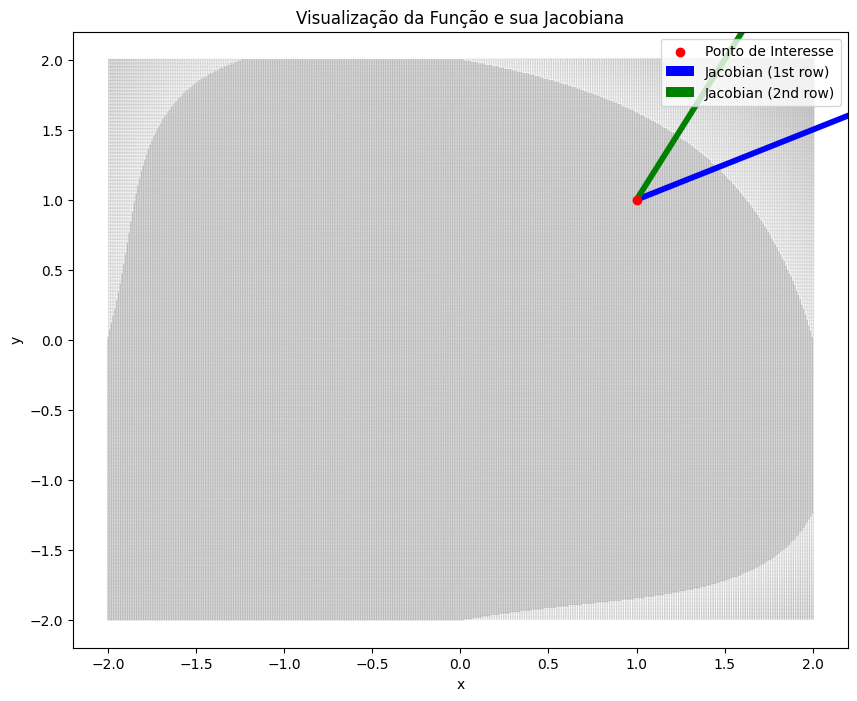

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

# Definindo a função f
def f(x, y):
    return np.array([x**2 + y, x + y**2])

# Calculando a Jacobiana de f
def jacobian(x, y):
    return np.array([[2*x, 1], [1, 2*y]])

# Ponto de interesse
point = np.array([1.0, 1.0])

# Calculando a Jacobiana no ponto de interesse
J = jacobian(point[0], point[1])
print("Jacobiana no ponto {}: \n{}".format(point, J))

# Verificando o posto da Jacobiana
rank_J = la.matrix_rank(J)
print(f"Posto da Jacobiana: {rank_J}")
print(f"Posto completo: {rank_J == min(J.shape)}")

# Gerando uma grade de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Calculando os valores da função f para essa grade
F1 = X**2 + Y
F2 = X + Y**2

# Plotando a função f e a Jacobiana
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, F1, F2, color='gray', alpha=0.5)
plt.scatter(point[0], point[1], color='red', zorder=5, label='Ponto de Interesse')

# Adicionando a Jacobiana no ponto de interesse
plt.quiver(point[0], point[1], J[0, 0], J[0, 1], color='blue', angles='xy', scale_units='xy', scale=1, label='Jacobian (1st row)')
plt.quiver(point[0], point[1], J[1, 0], J[1, 1], color='green', angles='xy', scale_units='xy', scale=1, label='Jacobian (2nd row)')

plt.title('Visualização da Função e sua Jacobiana')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Q.2 - Como se realiza feature learning? Como endereçar o problema da dimensionalidade?
=========================================

INTRO: Regime NTK de treinamento (ou lazy regime, kernel regime, linear regime)
_________________________________

Considere como constantes:
* quantidade de dados de treinamento;
* a dimensão de entrada da rede, expressa como $N_0$;
* a dimensão dos dados de saída, expressa como $N_{L+1}$;
* a profundidade da rede neural $L$, sendo $L \geq 1$

Inicializa-se o treinamento da rede, com uma configuração particular (mesma forma utilizada pelo pytorch):

$$W_{i, j}^l \sim \mathcal{N}(0, \frac{C_W}{N_{l-1}})$$

* Pesos iniciados com distribuições gaussianas independentes;
* A média dos pesos é igual a 0;
* A variação é escalonada de forma constante $C_W$ baseada da largura da camada anterior $N_{l-1}$.

Baseado nestas configurações, conforme a `largura das camadas escondidas aumenta`:

* No início, a rede neural convergirá em processo gaussiano com neurônios independentes, ou seja, não haverá correlação entre neurônios nem uma propensão para calcular a correlação entre eles;
* Durante a otimização, utilizando o fluxo de gradiente (ou descida de gradiente) $\mathcal{L}$, é possível substituir a rede neural não-linear por sua linearização:

$$\frac{du}{dt} \theta(t) = - \triangledown_\theta \mathcal{L}(\theta(t)), então$$
$$Z^{L+1}(\theta) \rightarrow Z^{lin}(\theta) = Z^{(L+1)}(\theta(0)) + \langle \triangledown_\theta Z(\theta(0)), \theta - \theta(0) \rangle$$

* $Z^{(L+1)}(\theta(0))$ é configuração inicial da rede;
* $\langle \triangledown_\theta Z(\theta(0)), \theta - \theta(0) \rangle$ é o termo de primeira ordem da expansão de Taylor, a partir da configuração inicial.

Ou seja:
* `Ao aumentar a largura das camadas escondidas de uma rede não-linear, seu comportamento tenderá a um modelo linear`;
* A matriz Jacobiana de uma rede linear é constante;
* `Requer-se, neste caso, que tão somente a matriz jacobiana na inicialização seja de posto completo`.

`Este regime afasta a possibilidade de feature learning, dado que seria necessário tão somente que a jacobiana inicial seja de posto completo`.

Premissa 2: há formas de sobrepujar o regime NTK
============================================

1. Alterar as técnicas de aprendizado:
* Mudar a forma de cáluclo da loss $\mathcal{L}$;
* Manter o step size da busca maior;
* Inserir técnicas de regularização (L1, L2, dropout, Elastic Net ...)

2. Considerar que os pontos de dados aumentam conforme a largura da rede aumenta.

Meta-teorema: Proporcionalidade entre largura e profundidade de uma rede
____________________________________________________________________________

$$
Quando \  as \  camadas \  N_l \  são \  largas, \  mas \  finitas \  (a \  rede \  é \  profunda, \  mas \  não \  tende \  ao \  infinito), \\
a \  distância \  entre \ Z^L \  e \  Z^{lin} \  é \  a \  razão \frac{L}{N}, \  como \  consequência \ de \ que \\
a \  correlação \  entre \  os \  neurônios \  também \  se \  traduz \  por \  \frac{L}{N} \ e \\
a \  variância \  dos \  gradientes \  ||\triangledown_\theta Z (\theta)||^2 \  também \  cresce \  em \  razão \  \frac{L}{N}
$$

Conclui-se, desta forma, que, sendo $\frac{L}{N} = \beta$:

* A melhor forma de se ajustar uma rede é tender tanto sua largura $N$ quanto sua profundidade $L$ ao infinito, em uma proporção fixa de crescimento (e não fixar uma e tender ao infinito a outra);
* A medida que $\beta$ aumenta, desenvolve-se `feature learning`, ou seja, se está mais longe de um modelo linear $Z^{lin}$, mas mais tendente a explosão e desaparecimento de gradientes;
* A medida que $\beta$ diminui, desenvolve-se `otimização`, ou seja se está mais estável para realizar descida de gradiente, mas aproxima-se da rede linear $Z^{lin}$, tendendo a overfitting.
PROVA:

Considere o caso mais simples de uma rede neural:

* A função de ativação é de identidade $\sigma (t) = t$, uma função linear que retorna o valor de entrada diretamente;
* A entrada é $|| x || = 1$, ou seja, a entrada é de norma 1 (ajusta-se os elementos do vetor de modo que o seu comprimento total seja 1). Um exemplo usando o vetor de entrada $x = [3,4]$ usando norma $L2$ expressa por $||x||_2$:
$$
x = [3,4] \\
||x||_2 = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5\\
x_{norm} = \frac{x}{||x||_2} = \frac{[3,4]}{5} = [0.6, 0.8]\\
||x_{norm}||_2 = \sqrt{0.6^2 + 0.8^2} = \sqrt{0.36 + 0.64} = \sqrt{1} = 1
$$
* A variação $C_W$ é de valor 1.
* Todas as camadas escondidas da rede $Z^{L+1}$ são do mesmo tamanho, ou seja, $N_l = N$

3. Considerar um método de configuração inicial de rede diferente:

Inicialização $\mu P$ (Mu P)
____________________________
A inicialização Mu P (Mu Propagation) é uma técnica de inicialização de pesos para redes neurais que visa melhorar a propagação do gradiente e evitar problemas como o desaparecimento ou explosão do gradiente.

* $\mu$ é um fator de escala que é usado para ajustar os pesos iniciais. O valor de $\mu$ depende da função de ativação escolhida;
* A variação dos pesos iniciais é definida com base no número de neurônios na camada anterior ($N_{t-1}$) e na camada seguinte ($N_{t+1}$). As variâncias podem ser calculadas da seguinte forma:
$$var(W) = \frac{\mu}{N_{t-1}}$$
* Os pesos são inicializados de acordo com a distribuição normal com média zero e variância $var(W)$:
$$W_{i, j}^l \sim \mathcal{N}(0, \frac{\mu}{N_{l-1}})$$

In [ ]:
import torch
import torch.nn as nn

def mu_p_init(layer, mu=2.0):
    if isinstance(layer, nn.Linear):
        fan_in = layer.weight.size(1)
        scale = mu / fan_in
        nn.init.normal_(layer.weight, mean=0, std=scale**0.5)
        if layer.bias is not None:
            nn.init.zeros_(layer.bias)

# Exemplo de uso
model = nn.Sequential(
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

model.apply(mu_p_init)

Sequential(
  (0): Linear(in_features=128, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

EXEMPLO PRÁTICO
----------------

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

In [ ]:
# Configurações de dispositivo: usar GPU se disponível
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Transformação para normalizar os dados do MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Carregar o dataset MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 48.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.62MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.32MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Divisão do dataset de treino para validação
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = random_split(trainset, [train_size, val_size])

In [ ]:
# loaders
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
valloader = DataLoader(valset, batch_size=32, shuffle=False)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

Construção de uma rede profunda (DNN)
______________________________________

In [ ]:
# Definir a Rede Neural Profunda (DNN)
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

Construção de rede larga (WNN)
______________________________

In [ ]:
# Definir a Rede Neural Larga (WNN)
class WideNeuralNetwork(nn.Module):
    def __init__(self):
        super(WideNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Inicialização
_______________

In [ ]:
# Inicializar os modelos, critério de perda e otimizador
model_dnn = DeepNeuralNetwork().to(device)
model_wnn = WideNeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss()

optimizer_dnn = optim.Adam(model_dnn.parameters(), lr=0.001)
optimizer_wnn = optim.Adam(model_wnn.parameters(), lr=0.001)

Função para treinamento
______________________

In [ ]:
# Função para treinar o modelo
def train_model(model, optimizer, trainloader, valloader, criterion, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            # Verificar gradientes
            for name, param in model.named_parameters():
                if param.grad is not None:
                    print(f"Gradient for {name}: {param.grad.abs().mean().item()}")

            optimizer.step()

            running_loss += loss.item()

        val_loss, val_accuracy = evaluate_model(model, valloader, criterion, device)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

Função para avaliação
____________________

In [ ]:
# Função para avaliar o modelo
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return total_loss / len(dataloader), accuracy

Função para teste
________________________

In [ ]:
# Função para testar o modelo
def test_model(model, testloader, device):
    test_loss, test_accuracy = evaluate_model(model, testloader, criterion, device)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Treinar DNN
______________

In [ ]:
# Treinar e testar a Rede Neural Profunda (DNN)
print("\nTraining Deep Neural Network (DNN)")
train_model(model_dnn, optimizer_dnn, trainloader, valloader, criterion, device)
print("Testing DNN")
test_model(model_dnn, testloader, device)

A saída de streaming foi truncada nas últimas 5000 linhas.
Gradient for fc2.bias: 0.002699049189686775
Gradient for fc3.weight: 0.002403012942522764
Gradient for fc3.bias: 0.0022066847886890173
Gradient for fc4.weight: 0.0017574313096702099
Gradient for fc4.bias: 0.0017469769809395075
Gradient for fc5.weight: 0.006121343933045864
Gradient for fc5.bias: 0.006571538746356964
Gradient for fc1.weight: 0.00041025594691745937
Gradient for fc1.bias: 0.0003946227370761335
Gradient for fc2.weight: 0.0011613022070378065
Gradient for fc2.bias: 0.0004916777834296227
Gradient for fc3.weight: 0.0006105059874244034
Gradient for fc3.bias: 0.0003130774130113423
Gradient for fc4.weight: 0.0004382848856039345
Gradient for fc4.bias: 0.00027477636467665434
Gradient for fc5.weight: 0.0010918325278908014
Gradient for fc5.bias: 0.0007113347528502345
Gradient for fc1.weight: 0.0033060747664421797
Gradient for fc1.bias: 0.003623741213232279
Gradient for fc2.weight: 0.009601650759577751
Gradient for fc2.bias: 0.

Treinar WNN
_______________

In [ ]:
# Treinar e testar a Rede Neural Larga (WNN)
print("\nTraining Wide Neural Network (WNN)")
train_model(model_wnn, optimizer_wnn, trainloader, valloader, criterion, device)
print("Testing WNN")
test_model(model_wnn, testloader, device)

A saída de streaming foi truncada nas últimas 5000 linhas.
Gradient for fc1.bias: 0.00016747124027460814
Gradient for fc2.weight: 0.0001023800068651326
Gradient for fc2.bias: 0.00018895573157351464
Gradient for fc3.weight: 0.001065155491232872
Gradient for fc3.bias: 0.001967493211850524
Gradient for fc1.weight: 0.0001748830545693636
Gradient for fc1.bias: 0.00018507230561226606
Gradient for fc2.weight: 0.00010785361519083381
Gradient for fc2.bias: 0.00019960540521424264
Gradient for fc3.weight: 0.0010064244270324707
Gradient for fc3.bias: 0.0017931817565113306
Gradient for fc1.weight: 0.00010533367458265275
Gradient for fc1.bias: 0.00011115046800114214
Gradient for fc2.weight: 7.815621211193502e-05
Gradient for fc2.bias: 0.00011379938950994983
Gradient for fc3.weight: 0.0008716477314010262
Gradient for fc3.bias: 0.001027649617753923
Gradient for fc1.weight: 8.86426932993345e-05
Gradient for fc1.bias: 9.815893281484023e-05
Gradient for fc2.weight: 7.249574264278635e-05
Gradient for fc2.

KeyboardInterrupt: 

DNN com gradiente desaparecendo
________________________________

In [ ]:
# Definir a Rede Neural Profunda (DNN) com ReLU
class DeepNeuralNetwork_vanishing(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork_vanishing, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 16)
        self.fc4 = nn.Linear(16, 16)
        self.fc5 = nn.Linear(16, 16)
        self.fc6 = nn.Linear(16, 16)
        self.fc7 = nn.Linear(16, 16)
        self.fc8 = nn.Linear(16, 16)
        self.fc9 = nn.Linear(16, 16)
        self.fc10 = nn.Linear(16, 16)
        self.fc11 = nn.Linear(16, 16)
        self.fc12 = nn.Linear(16, 16)
        self.fc13 = nn.Linear(16, 16)
        self.fc14 = nn.Linear(16, 16)
        self.fc15 = nn.Linear(16, 16)
        self.fc16 = nn.Linear(16, 16)
        self.fc17 = nn.Linear(16, 16)
        self.fc18 = nn.Linear(16, 16)
        self.fc19 = nn.Linear(16, 16)
        self.fc20 = nn.Linear(16, 16)
        self.fc21 = nn.Linear(16, 16)
        self.fc22 = nn.Linear(16, 16)
        self.fc23 = nn.Linear(16, 16)
        self.fc24 = nn.Linear(16, 16)
        self.fc25 = nn.Linear(16, 16)
        self.fc26 = nn.Linear(16, 16)
        self.fc27 = nn.Linear(16, 16)
        self.fc28 = nn.Linear(16, 16)
        self.fc29 = nn.Linear(16, 16)
        self.fc30 = nn.Linear(16, 16)
        self.fc31 = nn.Linear(16, 16)
        self.fc32 = nn.Linear(16, 16)
        self.fc33 = nn.Linear(16, 16)
        self.fc34 = nn.Linear(16, 16)
        self.fc35 = nn.Linear(16, 16)
        self.fc36 = nn.Linear(16, 16)
        self.fc37 = nn.Linear(16, 16)
        self.fc38 = nn.Linear(16, 16)
        self.fc39 = nn.Linear(16, 16)
        self.fc40 = nn.Linear(16, 16)
        self.fc41 = nn.Linear(16, 16)
        self.fc42 = nn.Linear(16, 16)
        self.fc43 = nn.Linear(16, 16)
        self.fc44 = nn.Linear(16, 16)
        self.fc45 = nn.Linear(16, 16)
        self.fc46 = nn.Linear(16, 16)
        self.fc47 = nn.Linear(16, 16)
        self.fc48 = nn.Linear(16, 16)
        self.fc49 = nn.Linear(16, 16)
        self.fc50 = nn.Linear(16, 16)
        self.fc51 = nn.Linear(16, 16)
        self.fc52 = nn.Linear(16, 16)
        self.fc53 = nn.Linear(16, 16)
        self.fc54 = nn.Linear(16, 16)
        self.fc55 = nn.Linear(16, 16)
        self.fc56 = nn.Linear(16, 16)
        self.fc57 = nn.Linear(16, 16)
        self.fc58 = nn.Linear(16, 16)
        self.fc59 = nn.Linear(16, 16)
        self.fc60 = nn.Linear(16, 16)
        self.fc61 = nn.Linear(16, 16)
        self.fc62 = nn.Linear(16, 16)
        self.fc63 = nn.Linear(16, 16)
        self.fc64 = nn.Linear(16, 16)
        self.fc65 = nn.Linear(16, 16)
        self.fc66 = nn.Linear(16, 16)
        self.fc67 = nn.Linear(16, 16)
        self.fc68 = nn.Linear(16, 16)
        self.fc69 = nn.Linear(16, 16)
        self.fc70 = nn.Linear(16, 16)
        self.fc71 = nn.Linear(16, 16)
        self.fc72 = nn.Linear(16, 16)
        self.fc73 = nn.Linear(16, 16)
        self.fc74 = nn.Linear(16, 16)
        self.fc75 = nn.Linear(16, 16)
        self.fc76 = nn.Linear(16, 16)
        self.fc77 = nn.Linear(16, 16)
        self.fc78 = nn.Linear(16, 16)
        self.fc79 = nn.Linear(16, 16)
        self.fc80 = nn.Linear(16, 16)
        self.fc81 = nn.Linear(16, 16)
        self.fc82 = nn.Linear(16, 16)
        self.fc83 = nn.Linear(16, 16)
        self.fc84 = nn.Linear(16, 16)
        self.fc85 = nn.Linear(16, 16)
        self.fc86 = nn.Linear(16, 16)
        self.fc87 = nn.Linear(16, 16)
        self.fc88 = nn.Linear(16, 16)
        self.fc89 = nn.Linear(16, 16)
        self.fc90 = nn.Linear(16, 16)
        self.fc91 = nn.Linear(16, 16)
        self.fc92 = nn.Linear(16, 16)
        self.fc93 = nn.Linear(16, 16)
        self.fc94 = nn.Linear(16, 16)
        self.fc95 = nn.Linear(16, 16)
        self.fc96 = nn.Linear(16, 16)
        self.fc97 = nn.Linear(16, 16)
        self.fc98 = nn.Linear(16, 16)
        self.fc99 = nn.Linear(16, 16)
        self.fc100 = nn.Linear(16, 10)

        # Inicialização inadequada dos pesos
        nn.init.uniform_(self.fc1.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc2.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc3.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc4.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc5.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc6.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc7.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc8.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc9.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc10.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc11.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc12.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc13.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc14.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc15.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc16.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc17.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc18.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc19.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc20.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc21.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc22.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc23.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc24.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc25.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc26.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc27.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc28.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc29.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc30.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc31.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc32.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc33.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc34.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc35.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc36.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc37.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc38.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc39.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc40.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc41.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc42.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc43.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc44.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc45.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc46.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc47.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc48.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc49.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc50.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc51.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc52.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc53.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc54.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc55.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc56.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc57.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc58.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc59.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc60.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc61.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc62.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc63.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc64.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc65.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc66.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc67.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc68.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc69.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc70.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc71.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc72.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc73.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc74.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc75.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc76.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc77.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc78.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc79.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc80.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc81.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc82.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc83.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc84.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc85.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc86.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc87.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc88.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc89.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc90.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc91.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc92.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc93.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc94.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc95.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc96.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc97.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc98.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc99.weight, a=-0.01, b=0.01)
        nn.init.uniform_(self.fc100.weight, a=-0.01, b=0.01)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        x = torch.relu(self.fc9(x))
        x = torch.relu(self.fc10(x))
        x = torch.relu(self.fc11(x))
        x = torch.relu(self.fc12(x))
        x = torch.relu(self.fc13(x))
        x = torch.relu(self.fc14(x))
        x = torch.relu(self.fc15(x))
        x = torch.relu(self.fc16(x))
        x = torch.relu(self.fc17(x))
        x = torch.relu(self.fc18(x))
        x = torch.relu(self.fc19(x))
        x = torch.relu(self.fc20(x))
        x = torch.relu(self.fc21(x))
        x = torch.relu(self.fc22(x))
        x = torch.relu(self.fc23(x))
        x = torch.relu(self.fc24(x))
        x = torch.relu(self.fc25(x))
        x = torch.relu(self.fc26(x))
        x = torch.relu(self.fc27(x))
        x = torch.relu(self.fc28(x))
        x = torch.relu(self.fc29(x))
        x = torch.relu(self.fc30(x))
        x = torch.relu(self.fc31(x))
        x = torch.relu(self.fc32(x))
        x = torch.relu(self.fc33(x))
        x = torch.relu(self.fc34(x))
        x = torch.relu(self.fc35(x))
        x = torch.relu(self.fc36(x))
        x = torch.relu(self.fc37(x))
        x = torch.relu(self.fc38(x))
        x = torch.relu(self.fc39(x))
        x = torch.relu(self.fc40(x))
        x = torch.relu(self.fc41(x))
        x = torch.relu(self.fc42(x))
        x = torch.relu(self.fc43(x))
        x = torch.relu(self.fc44(x))
        x = torch.relu(self.fc45(x))
        x = torch.relu(self.fc46(x))
        x = torch.relu(self.fc47(x))
        x = torch.relu(self.fc48(x))
        x = torch.relu(self.fc49(x))
        x = torch.relu(self.fc50(x))
        x = torch.relu(self.fc51(x))
        x = torch.relu(self.fc52(x))
        x = torch.relu(self.fc53(x))
        x = torch.relu(self.fc54(x))
        x = torch.relu(self.fc55(x))
        x = torch.relu(self.fc56(x))
        x = torch.relu(self.fc57(x))
        x = torch.relu(self.fc58(x))
        x = torch.relu(self.fc59(x))
        x = torch.relu(self.fc60(x))
        x = torch.relu(self.fc61(x))
        x = torch.relu(self.fc62(x))
        x = torch.relu(self.fc63(x))
        x = torch.relu(self.fc64(x))
        x = torch.relu(self.fc65(x))
        x = torch.relu(self.fc66(x))
        x = torch.relu(self.fc67(x))
        x = torch.relu(self.fc68(x))
        x = torch.relu(self.fc69(x))
        x = torch.relu(self.fc70(x))
        x = torch.relu(self.fc71(x))
        x = torch.relu(self.fc72(x))
        x = torch.relu(self.fc73(x))
        x = torch.relu(self.fc74(x))
        x = torch.relu(self.fc75(x))
        x = torch.relu(self.fc76(x))
        x = torch.relu(self.fc77(x))
        x = torch.relu(self.fc78(x))
        x = torch.relu(self.fc79(x))
        x = torch.relu(self.fc80(x))
        x = torch.relu(self.fc81(x))
        x = torch.relu(self.fc82(x))
        x = torch.relu(self.fc83(x))
        x = torch.relu(self.fc84(x))
        x = torch.relu(self.fc85(x))
        x = torch.relu(self.fc86(x))
        x = torch.relu(self.fc87(x))
        x = torch.relu(self.fc88(x))
        x = torch.relu(self.fc89(x))
        x = torch.relu(self.fc90(x))
        x = torch.relu(self.fc91(x))
        x = torch.relu(self.fc92(x))
        x = torch.relu(self.fc93(x))
        x = torch.relu(self.fc94(x))
        x = torch.relu(self.fc95(x))
        x = torch.relu(self.fc96(x))
        x = torch.relu(self.fc97(x))
        x = torch.relu(self.fc98(x))
        x = torch.relu(self.fc99(x))
        x = self.fc100(x)
        return x

# Inicializar o modelo, critério de perda e otimizador
model_dnn_vanishing = DeepNeuralNetwork_vanishing().to(device)

WNN com gradiente explodindo
___________________________

In [ ]:
# Definir a Rede Neural Larga (WNN) com muitas camadas e neurônios
class WideNeuralNetwork_explode(nn.Module):
    def __init__(self):
        super(WideNeuralNetwork_explode, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Inicializar o modelo, critério de perda e otimizador
model_wnn_explode = WideNeuralNetwork_explode().to(device)

Treinar redes com problemas
_______________________

In [ ]:
# Treinar e testar a Rede Neural Profunda (DNN)
print("\nTraining Deep Neural Network (DNN)")
train_model(model_dnn_vanishing, optimizer_dnn, trainloader, valloader, criterion, device)
print("Testing DNN")
test_model(model_dnn_vanishing, testloader, device)

A saída de streaming foi truncada nas últimas 5000 linhas.
Gradient for fc1.weight: 0.0
Gradient for fc1.bias: 0.0
Gradient for fc2.weight: 0.0
Gradient for fc2.bias: 0.0
Gradient for fc3.weight: 0.0
Gradient for fc3.bias: 0.0
Gradient for fc4.weight: 0.0
Gradient for fc4.bias: 0.0
Gradient for fc5.weight: 0.0
Gradient for fc5.bias: 0.0
Gradient for fc6.weight: 0.0
Gradient for fc6.bias: 0.0
Gradient for fc7.weight: 0.0
Gradient for fc7.bias: 0.0
Gradient for fc8.weight: 0.0
Gradient for fc8.bias: 0.0
Gradient for fc9.weight: 0.0
Gradient for fc9.bias: 0.0
Gradient for fc10.weight: 0.0
Gradient for fc10.bias: 0.0
Gradient for fc11.weight: 0.0
Gradient for fc11.bias: 0.0
Gradient for fc12.weight: 0.0
Gradient for fc12.bias: 0.0
Gradient for fc13.weight: 0.0
Gradient for fc13.bias: 0.0
Gradient for fc14.weight: 0.0
Gradient for fc14.bias: 0.0
Gradient for fc15.weight: 0.0
Gradient for fc15.bias: 0.0
Gradient for fc16.weight: 0.0
Gradient for fc16.bias: 0.0
Gradient for fc17.weight: 0.0
G

KeyboardInterrupt: 

In [ ]:
# Treinar e testar a Rede Neural Larga (WNN)
print("\nTraining Wide Neural Network (WNN)")
train_model(model_wnn_explode, optimizer_wnn, trainloader, valloader, criterion, device)
print("Testing WNN")
test_model(model_wnn_explode, testloader, device)

Streaming output truncated to the last 5000 lines.
Gradient for fc3.weight: 26.48677635192871
Gradient for fc3.bias: 117.267333984375
Gradient for fc1.weight: 1.9360071420669556
Gradient for fc1.bias: 1.737168550491333
Gradient for fc2.weight: 1.3566941022872925
Gradient for fc2.bias: 3.406632661819458
Gradient for fc3.weight: 26.488739013671875
Gradient for fc3.bias: 117.27459716796875
Gradient for fc1.weight: 1.936123251914978
Gradient for fc1.bias: 1.7372599840164185
Gradient for fc2.weight: 1.356778621673584
Gradient for fc2.bias: 3.406714916229248
Gradient for fc3.weight: 26.490121841430664
Gradient for fc3.bias: 117.27574157714844
Gradient for fc1.weight: 1.9362646341323853
Gradient for fc1.bias: 1.7373781204223633
Gradient for fc2.weight: 1.3568743467330933
Gradient for fc2.bias: 3.4068853855133057
Gradient for fc3.weight: 26.491802215576172
Gradient for fc3.bias: 117.2705307006836
Gradient for fc1.weight: 1.9364057779312134
Gradient for fc1.bias: 1.7375073432922363
Gradient for